The objectove of the project is to Predict the volume of cars of a point at a given timePredict the volume of cars of a point at a given time. 

Questions:

- What affect the number of cars at a specific point?
- What are the daily trend /. Hourly trends / monthly trend / weekly trend
- Does a closure at nearby point impact the traffic at that specific point
- What affect weekend / bank holidays  have on the traffic at that specific point

## Data Dictionary


#### Data Dictionary: Count Points


| **Column Name**               | **Description**                                                | **Data Type** |
|-------------------------------|----------------------------------------------------------------|---------------|
| **count_point_id**             | A unique identifier for the count point.                       | int64         |
| **region_id**                  | Identifier for the region where the count point is located.    | int64         |
| **region_name**                | Name of the region where the count point is located.           | object        |
| **local_authority_id**         | Identifier for the local authority where the count point is located. | int64         |
| **local_authority_name**       | Name of the local authority where the count point is located.  | object        |
| **road_name**                  | Name of the road where the count point is located.             | object        |
| **road_type**                  | Type of the road (e.g., major, minor).                         | object        |
| **start_junction_road_name**   | Name of the road at the start junction of the link.            | object        |
| **end_junction_road_name**     | Name of the road at the end junction of the link.              | object        |
| **easting**                    | Easting coordinate of the count point location.                | int64         |
| **northing**                   | Northing coordinate of the count point location.               | int64         |
| **latitude**                   | Latitude of the count point location.                          | float64       |
| **longitude**                  | Longitude of the count point location.                         | float64       |
| **link_length_km**             | Length of the road link in kilometers.                         | float64       |
| **link_length_miles**          | Length of the road link in miles.                              | float64       |

#### Data Dictionary: Raw Count

### Data Dictionary: Raw_Count

| **Variable Name**                 | **Description**                                                                                       | **Data Type** |
|-----------------------------------|-------------------------------------------------------------------------------------------------------|---------------|
| **Count_point_id**                | A unique reference identifier for the road link associated with the count data.                        | Integer       |
| **Direction_of_travel**           | Direction of travel for the vehicles being counted (e.g., Northbound, Southbound).                     | String        |
| **Year**                          | The year in which the count was recorded.                                                              | Integer       |
| **Count_date**                    | The date on which the actual count took place.                                                         | Date          |
| **Hour**                          | The hour during which the count took place. `7` represents 7am-8am, and `17` represents 5pm-6pm.       | Integer       |
| **Region_id**                     | Website region identifier.                                                                             | Integer       |
| **Region_name**                   | The name of the region where the count point (CP) is located.                                          | String        |
| **Region_ons_code**               | The Office for National Statistics (ONS) code identifier for the region.                               | String        |
| **Local_authority_id**            | Website local authority identifier.                                                                    | Integer       |
| **Local_authority_name**          | The name of the local authority where the CP is located.                                               | String        |
| **Local_authority_code**          | The ONS code identifier for the local authority.                                                       | String        |
| **Road_name**                     | The name of the road where the count took place (e.g., M25, A3).                                       | String        |
| **Road_category**                 | The classification of the road type (e.g., Motorway, A Road, B Road).                                  | String        |
| **Road_type**                     | Indicates whether the road is classified as a 'major' or 'minor' road.                                 | String        |
| **Start_junction_road_name**      | The road name of the start junction of the link.                                                       | String        |
| **End_junction_road_name**        | The road name of the end junction of the link.                                                         | String        |
| **Easting**                       | The easting coordinate of the CP location.                                                             | Float         |
| **Northing**                      | The northing coordinate of the CP location.                                                            | Float         |
| **Latitude**                      | The latitude of the CP location.                                                                       | Float         |
| **Longitude**                     | The longitude of the CP location.                                                                      | Float         |
| **Link_length_km**                | The total length of the network road link for that CP (in kilometers).                                 | Float         |
| **Link_length_miles**             | The total length of the network road link for that CP (in miles).                                      | Float         |
| **Pedal_cycles**                  | The count of pedal cycles.                                                                             | Integer       |
| **Two_wheeled_motor_vehicles**    | The count of two-wheeled motor vehicles.                                                               | Integer       |
| **Cars_and_taxis**                | The count of cars and taxis.                                                                           | Integer       |
| **Buses_and_coaches**             | The count of buses and coaches.                                                                        | Integer       |
| **LGVs**                          | The count of Light Goods Vehicles (LGVs).                                                              | Integer       |
| **HGVs_2_rigid_axle**             | The count of Heavy Goods Vehicles (HGVs) with 2 rigid axles.                                           | Integer       |
| **HGVs_3_rigid_axle**             | The count of HGVs with 3 rigid axles.                                                                  | Integer       |
| **HGVs_4_or_more_rigid_axle**     | The count of HGVs with 4 or more rigid axles.                                                          | Integer       |
| **HGVs_3_or_4_articulated_axle**  | The count of HGVs with 3 or 4 articulated axles.                                                       | Integer       |
| **HGVs_5_articulated_axle**       | The count of HGVs with 5 articulated axles.     


In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [37]:
pd_count_points = pd.read_csv('../data/dft_countpoints_region_id_7.csv')

In [38]:
pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')

/var/folders/_z/nz5spzqj2rl11n5lc_k1cwwc0000gn/T/ipykernel_17040/254017237.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')


### Data Inspection

In [43]:
pd_count_points.sample()

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
342,951605,7,East of England,78,Hertfordshire,U,Minor,NaN,NaN,535252,213773,51.806245,-0.039677,NaN,NaN


In [100]:
pd_count_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   count_point_id            4981 non-null   int64  
 1   region_id                 4981 non-null   int64  
 2   region_name               4981 non-null   object 
 3   local_authority_id        4981 non-null   int64  
 4   local_authority_name      4981 non-null   object 
 5   road_name                 4981 non-null   object 
 6   road_type                 4981 non-null   object 
 7   start_junction_road_name  1867 non-null   object 
 8   end_junction_road_name    1867 non-null   object 
 9   easting                   4981 non-null   int64  
 10  northing                  4981 non-null   int64  
 11  latitude                  4981 non-null   float64
 12  longitude                 4981 non-null   float64
 13  link_length_km            1872 non-null   float64
 14  link_len

In [44]:
pd_raw_count.sample()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
50433,18222,N,2001,2001-05-11,16,7,East of England,126,Suffolk,A14,...,6,361,72.0,32,9,13,92,82,300.0,2691.0


In [41]:
pd_count_points.shape

(4981, 15)

In [46]:
pd_raw_count.shape

(550056, 32)

In [42]:
pd_count_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   count_point_id            4981 non-null   int64  
 1   region_id                 4981 non-null   int64  
 2   region_name               4981 non-null   object 
 3   local_authority_id        4981 non-null   int64  
 4   local_authority_name      4981 non-null   object 
 5   road_name                 4981 non-null   object 
 6   road_type                 4981 non-null   object 
 7   start_junction_road_name  1867 non-null   object 
 8   end_junction_road_name    1867 non-null   object 
 9   easting                   4981 non-null   int64  
 10  northing                  4981 non-null   int64  
 11  latitude                  4981 non-null   float64
 12  longitude                 4981 non-null   float64
 13  link_length_km            1872 non-null   float64
 14  link_len

In [47]:
pd_raw_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550056 entries, 0 to 550055
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                550056 non-null  int64  
 1   direction_of_travel           550056 non-null  object 
 2   year                          550056 non-null  int64  
 3   count_date                    550056 non-null  object 
 4   hour                          550056 non-null  int64  
 5   region_id                     550056 non-null  int64  
 6   region_name                   550056 non-null  object 
 7   local_authority_id            550056 non-null  int64  
 8   local_authority_name          550056 non-null  object 
 9   road_name                     550056 non-null  object 
 10  road_type                     550056 non-null  object 
 11  start_junction_road_name      220716 non-null  object 
 12  end_junction_road_name        220716 non-nul

In [94]:
# Summary Statistics
print("\nSummary statistics for pd_count_points:")
print(pd_count_points.describe())

print("\nSummary statistics for pd_raw_count:")
print(pd_raw_count.describe())


Summary statistics for pd_count_points:
       count_point_id  region_id  local_authority_id        easting  \
count     4981.000000     4981.0         4981.000000    4981.000000   
mean    575408.971692        7.0          119.998394  563188.690022   
std     406875.661803        0.0           31.476089   42950.266169   
min       6003.000000        7.0           58.000000  488780.000000   
25%      77179.000000        7.0           97.000000  522896.000000   
50%     806231.000000        7.0          123.000000  562548.000000   
75%     941273.000000        7.0          129.000000  598282.000000   
max     999996.000000        7.0          208.000000  655040.000000   

            northing     latitude    longitude  link_length_km  \
count    4981.000000  4981.000000  4981.000000     1872.000000   
mean   249144.782574    52.114775     0.384187        3.105401   
std     44381.857675     0.393338     0.636952        4.055659   
min    175547.000000    51.455053    -0.712785        0

TODO:

- Reformate and check datatypes
- Check for duplicates 
- CHeck for NUlls

## Data Cleaning

Three main areas focus in this stage of the project:

   - Check that datatypes and formatting is all correct.
   - Check for duplicates.
   - Check for null (missing) values.
   - additionally: erroneous data

### Data Formatting

TODO:

Transform to datetime:

- count_date and hour

In [91]:
# Data Types
print("\nData types in pd_count_points:")
print(pd_count_points.dtypes)

print("\nData types in pd_raw_count:")
print(pd_raw_count.dtypes)


Data types in pd_count_points:
count_point_id                int64
region_id                     int64
region_name                  object
local_authority_id            int64
local_authority_name         object
road_name                    object
road_type                    object
start_junction_road_name     object
end_junction_road_name       object
easting                       int64
northing                      int64
latitude                    float64
longitude                   float64
link_length_km              float64
link_length_miles           float64
dtype: object

Data types in pd_raw_count:
count_point_id                           int64
direction_of_travel                     object
year                                     int64
count_date                      datetime64[ns]
hour                                     int64
region_id                                int64
region_name                             object
local_authority_id                       int64
local_aut

In [53]:
# conver count_date to datetime type
pd_raw_count['count_date'] =  pd.to_datetime(pd_raw_count['count_date'])

In [79]:
# Extract Date Components: Create new columns for the year, month, day, and day of the week
pd_raw_count['Month'] = pd_raw_count['count_date'].dt.month
pd_raw_count['Day_of_Week'] = pd_raw_count['count_date'].dt.day_name()
pd_raw_count['Day'] = pd_raw_count['count_date'].dt.day


In [80]:
pd_raw_count.sample(2)

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,Month,Day_of_Week,Day
259513,806651,S,2019,2019-06-25,9,7,East of England,154,Norfolk,U,...,0,0,0,0,0,1.0,66.0,6,Tuesday,25
166258,58073,W,2008,2008-10-07,17,7,East of England,97,Cambridgeshire,A14,...,8,3,7,90,67,202.0,1461.0,10,Tuesday,7


In [92]:
# Data Integrity Checks - Unique Identifiers
print("\nUnique count_point_id in pd_count_points:", pd_count_points['count_point_id'].nunique())
print("Total rows in pd_count_points:", len(pd_count_points))



Unique count_point_id in pd_count_points: 4981
Total rows in pd_count_points: 4981


In [93]:
# Consistency Check
# Ensure that all count_point_id in pd_raw_count are also in pd_count_points
inconsistent_ids = pd_raw_count[~pd_raw_count['count_point_id'].isin(pd_count_points['count_point_id'])]
print("\nInconsistent count_point_ids (not found in pd_count_points):")
print(inconsistent_ids)


Inconsistent count_point_ids (not found in pd_count_points):
        count_point_id direction_of_travel  year count_date  hour  region_id  \
442404          941987                   E  2009 2009-06-08     7          7   
442405          941987                   E  2009 2009-06-08     8          7   
442406          941987                   E  2009 2009-06-08     9          7   
442407          941987                   E  2009 2009-06-08    10          7   
442408          941987                   E  2009 2009-06-08    11          7   
...                ...                 ...   ...        ...   ...        ...   
442543          941987                   W  2014 2014-06-09    14          7   
442544          941987                   W  2014 2014-06-09    15          7   
442545          941987                   W  2014 2014-06-09    16          7   
442546          941987                   W  2014 2014-06-09    17          7   
442547          941987                   W  2014 2014-06-0

### Check for duplicated

In [95]:
pd_count_points.duplicated().value_counts()

False    4981
Name: count, dtype: int64

In [96]:
pd_raw_count.duplicated().value_counts()

False    550056
Name: count, dtype: int64

Notes:

- There is no duplicates. Data already aggrated

### Check for Nulls

In [97]:
# Checking for missing values
print("Missing values in pd_count_points:")
print(pd_count_points.isnull().sum())

print("\nMissing values in pd_raw_count:")
print(pd_raw_count.isnull().sum())

Missing values in pd_count_points:
count_point_id                 0
region_id                      0
region_name                    0
local_authority_id             0
local_authority_name           0
road_name                      0
road_type                      0
start_junction_road_name    3114
end_junction_road_name      3114
easting                        0
northing                       0
latitude                       0
longitude                      0
link_length_km              3109
link_length_miles           3109
dtype: int64

Missing values in pd_raw_count:
count_point_id                       0
direction_of_travel                  0
year                                 0
count_date                           0
hour                                 0
region_id                            0
region_name                          0
local_authority_id                   0
local_authority_name                 0
road_name                            0
road_type                         

Notes:
- 

### Data Exploration

In [82]:
# Traffic Periods: Create a column for traffic periods (e.g., morning rush, evening rush) based on the hour column.
pd_raw_count['Traffic_Period'] = pd.cut(pd_raw_count['hour'], 
                                        bins=[0, 6, 10, 16, 19, 24], 
                                        labels=['Night', 'Morning_Rush', 'Day', 'Evening_Rush', 'Late_Night'],
                                        right=False)


In [83]:
pd_raw_count[['cars_and_taxis', 'all_motor_vehicles']].describe()


,cars_and_taxis,all_motor_vehicles
count,550056.000000,550054.000000
mean,398.602911,525.561992
std,590.462086,805.842646
min,0.000000,0.000000
25%,36.000000,45.000000
50%,160.000000,201.000000
75%,512.000000,648.000000
max,7026.000000,8664.000000


<Axes: title={'center': 'Average Number of Cars by Hour'}, xlabel='hour'>

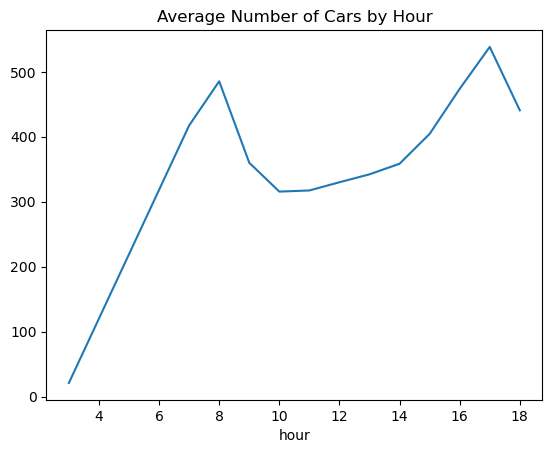

In [84]:
pd_raw_count.groupby('hour')['cars_and_taxis'].mean().plot(kind='line', title='Average Number of Cars by Hour')


<Axes: title={'center': 'Average Number of Cars by Day of the Week'}, xlabel='Day_of_Week'>

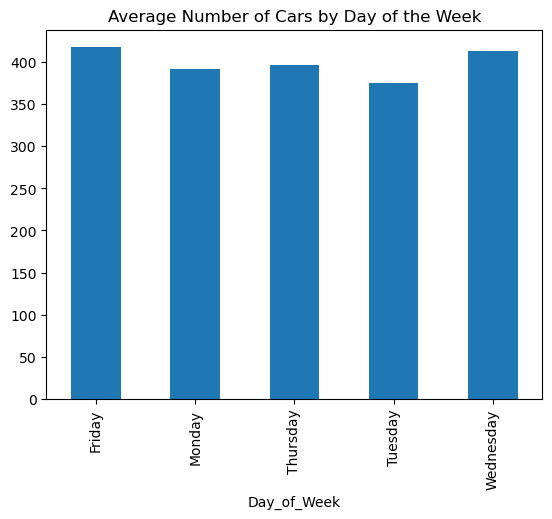

In [85]:
pd_raw_count.groupby('Day_of_Week')['cars_and_taxis'].mean().plot(kind='bar', title='Average Number of Cars by Day of the Week')


In [ ]:
pd_raw_count['count_point_id'].value_counts()

In [69]:
pd_raw_count.loc[pd_raw_count['count_point_id'] == 6213].head(10)

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
5352,6213,E,2000,2000-04-10,7,7,East of England,128,Thurrock,A13,...,3,205,61.0,7,28,6,27,21,150.0,1436.0
5353,6213,E,2000,2000-04-10,8,7,East of England,128,Thurrock,A13,...,17,213,60.0,7,29,2,32,20,150.0,1689.0
5354,6213,E,2000,2000-04-10,9,7,East of England,128,Thurrock,A13,...,12,192,77.0,9,23,6,35,19,169.0,1315.0
5355,6213,E,2000,2000-04-10,10,7,East of England,128,Thurrock,A13,...,5,215,88.0,16,32,15,31,25,207.0,1352.0
5356,6213,E,2000,2000-04-10,11,7,East of England,128,Thurrock,A13,...,1,229,86.0,13,20,4,41,13,177.0,1284.0
5357,6213,E,2000,2000-04-10,12,7,East of England,128,Thurrock,A13,...,2,244,80.0,11,26,3,36,27,183.0,1507.0
5358,6213,E,2000,2000-04-10,13,7,East of England,128,Thurrock,A13,...,3,293,87.0,24,27,5,41,11,195.0,1591.0
5359,6213,E,2000,2000-04-10,14,7,East of England,128,Thurrock,A13,...,6,388,78.0,8,33,11,30,21,181.0,1945.0
5360,6213,E,2000,2000-04-10,15,7,East of England,128,Thurrock,A13,...,13,563,104.0,12,35,10,18,20,199.0,2389.0
5361,6213,E,2000,2000-04-10,16,7,East of England,128,Thurrock,A13,...,13,715,91.0,9,17,10,26,7,160.0,3335.0


In [98]:
count_point_id_smaple = pd_raw_count.query('count_point_id == 6213')

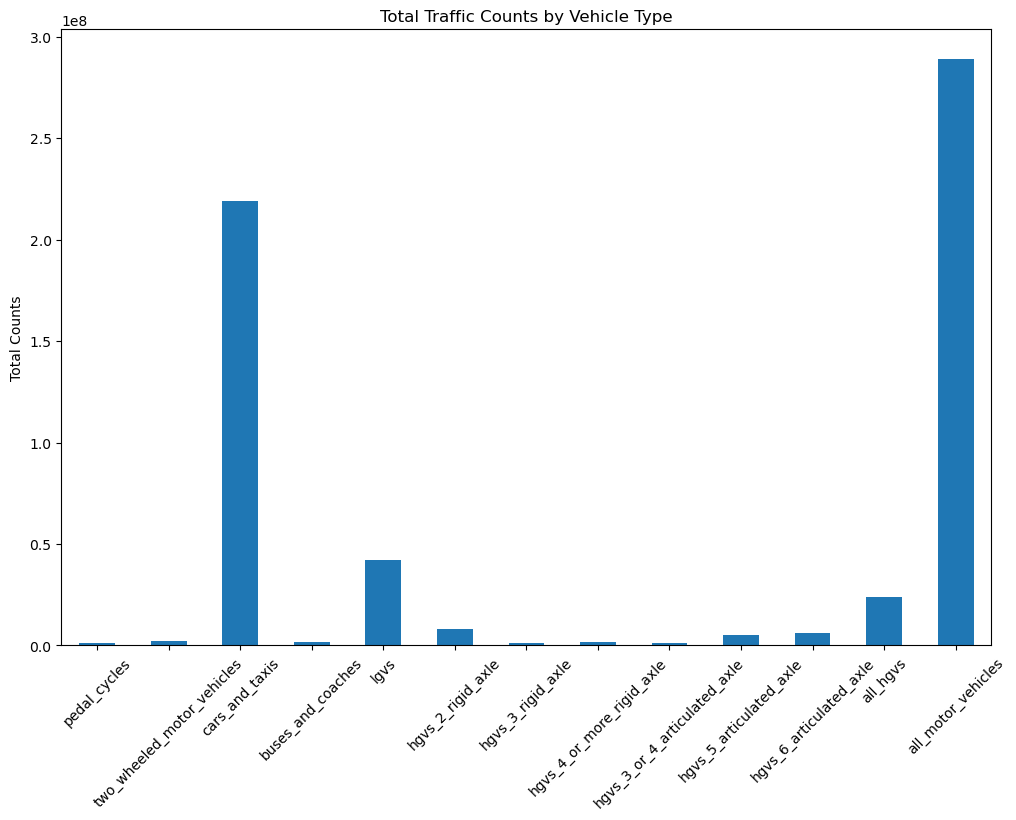

In [15]:
# 3. Exploratory Data Analysis (EDA)
# 3.1 Traffic Counts Distribution
vehicle_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
    'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
    'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle',
    'all_hgvs', 'all_motor_vehicles'
]

plt.figure(figsize=(12, 8))
pd_raw_count[vehicle_columns].sum().plot(kind='bar')
plt.title('Total Traffic Counts by Vehicle Type')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.show()

<Figure size 3000x1800 with 0 Axes>

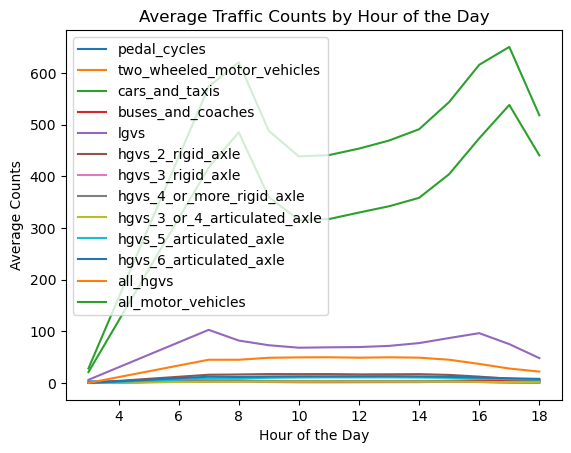

In [16]:
# 3.2 Temporal Trends
# Example: Average number of vehicles per hour across all count points
avg_hourly_counts = pd_raw_count.groupby('hour')[vehicle_columns].mean()
plt.figure(figsize=(30, 18))
avg_hourly_counts.plot()
plt.title('Average Traffic Counts by Hour of the Day')
plt.ylabel('Average Counts')
plt.xlabel('Hour of the Day')
plt.show()

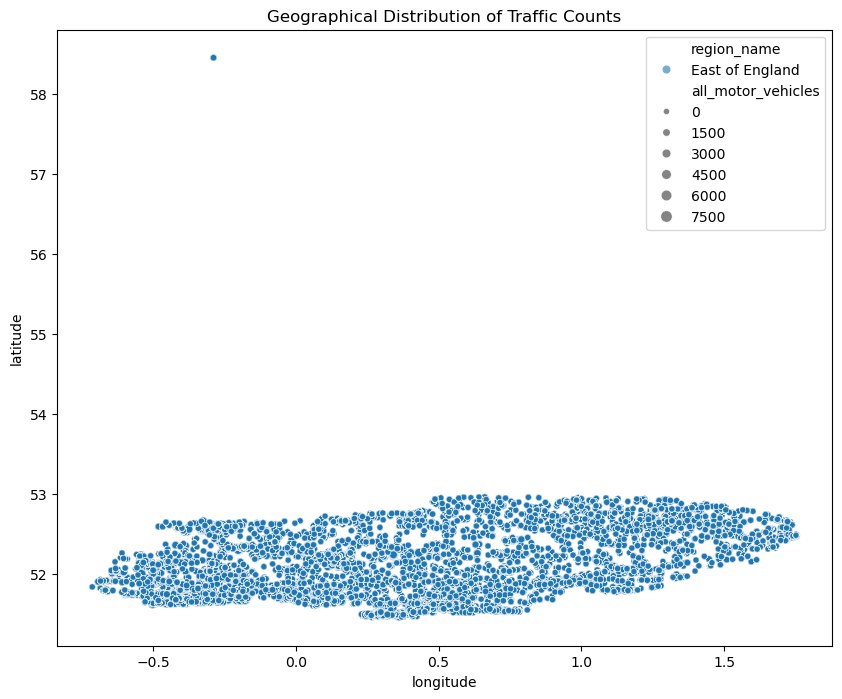

In [17]:
# 3.3 Geographical Analysis
# Scatter plot of traffic counts by location
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pd_raw_count, x='longitude', y='latitude', size='all_motor_vehicles', hue='region_name', alpha=0.6)
plt.title('Geographical Distribution of Traffic Counts')
plt.show()

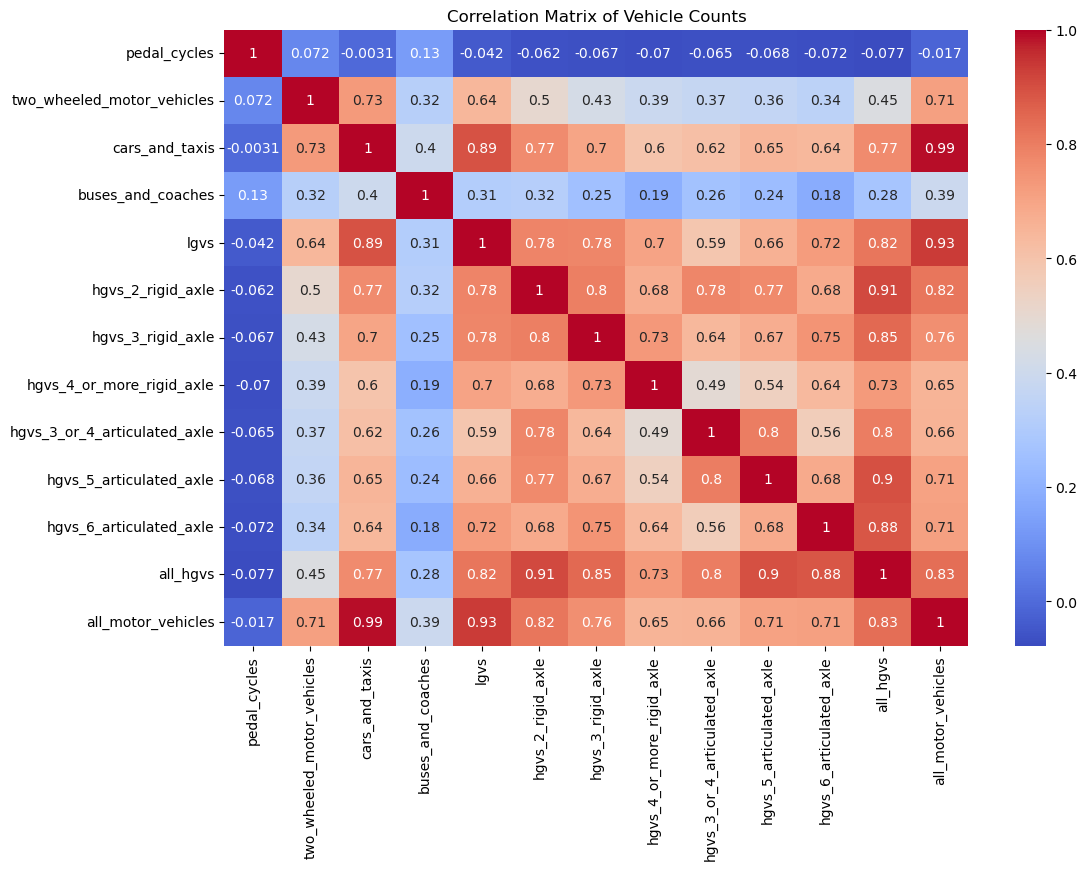

In [18]:
# 3.4 Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(pd_raw_count[vehicle_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vehicle Counts')
plt.show()

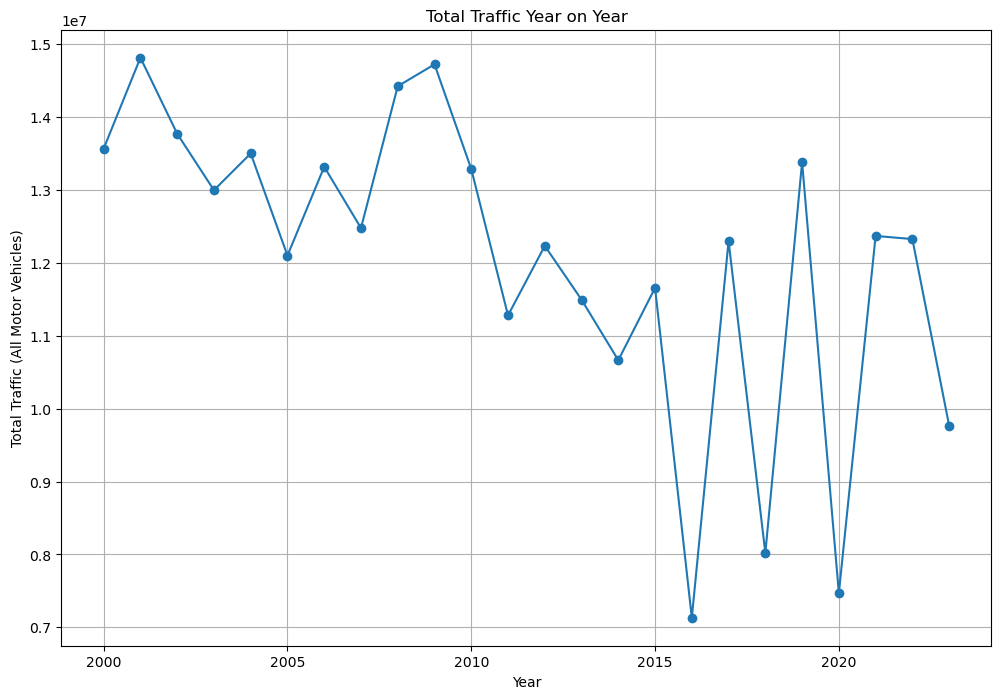

In [19]:
# Aggregate Traffic Data by Year
# Summing up all motor vehicles for each year
yearly_traffic = pd_raw_count.groupby('year')['all_motor_vehicles'].sum().reset_index()

# 2. Plot Year-on-Year Traffic Trends
plt.figure(figsize=(12, 8))
plt.plot(yearly_traffic['year'], yearly_traffic['all_motor_vehicles'], marker='o', linestyle='-')
plt.title('Total Traffic Year on Year')
plt.xlabel('Year')
plt.ylabel('Total Traffic (All Motor Vehicles)')
plt.grid(True)
plt.show()

In [20]:
yearly_traffic.columns

Index(['year', 'all_motor_vehicles'], dtype='object')

In [21]:
# Analyze Overall Patterns
# Calculate the percentage change year on year
yearly_traffic['yearly_change_%'] = yearly_traffic['all_motor_vehicles'].pct_change() * 100

# Print the yearly traffic and percentage change
print(yearly_traffic)

    year  all_motor_vehicles  yearly_change_%
0   2000          13568089.0              NaN
1   2001          14815110.0         9.190837
2   2002          13772152.0        -7.039826
3   2003          12997545.0        -5.624444
4   2004          13501669.0         3.878609
5   2005          12101193.0       -10.372614
6   2006          13318558.0        10.059876
7   2007          12478332.0        -6.308686
8   2008          14424058.0        15.592837
9   2009          14724207.0         2.080892
10  2010          13288277.0        -9.752172
11  2011          11279765.0       -15.114917
12  2012          12233803.0         8.457960
13  2013          11495353.0        -6.036144
14  2014          10664878.0        -7.224441
15  2015          11657227.0         9.304832
16  2016           7131845.0       -38.820399
17  2017          12298714.0        72.447859
18  2018           8019271.0       -34.795858
19  2019          13382236.0        66.875967
20  2020           7469868.0      

In [22]:
pd_raw_count.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [23]:
pd_count_points.columns

Index(['count_point_id', 'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles'],
      dtype='object')

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Verify the columns
print("pd_count_points columns:", pd_count_points.columns)
print("pd_raw_count columns:", pd_raw_count.columns)

# Assuming 'longitude' and 'latitude' exist, if they don't, use the correct names
df = pd.merge(pd_raw_count, pd_count_points[['count_point_id', 'latitude', 'longitude']], on='count_point_id')

# Check for missing values
df = df.dropna(subset=['longitude', 'latitude'])


In [30]:
df.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude_x', 'longitude_x', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles',
       'latitude_y', 'longitude_y'],
      dtype='object')

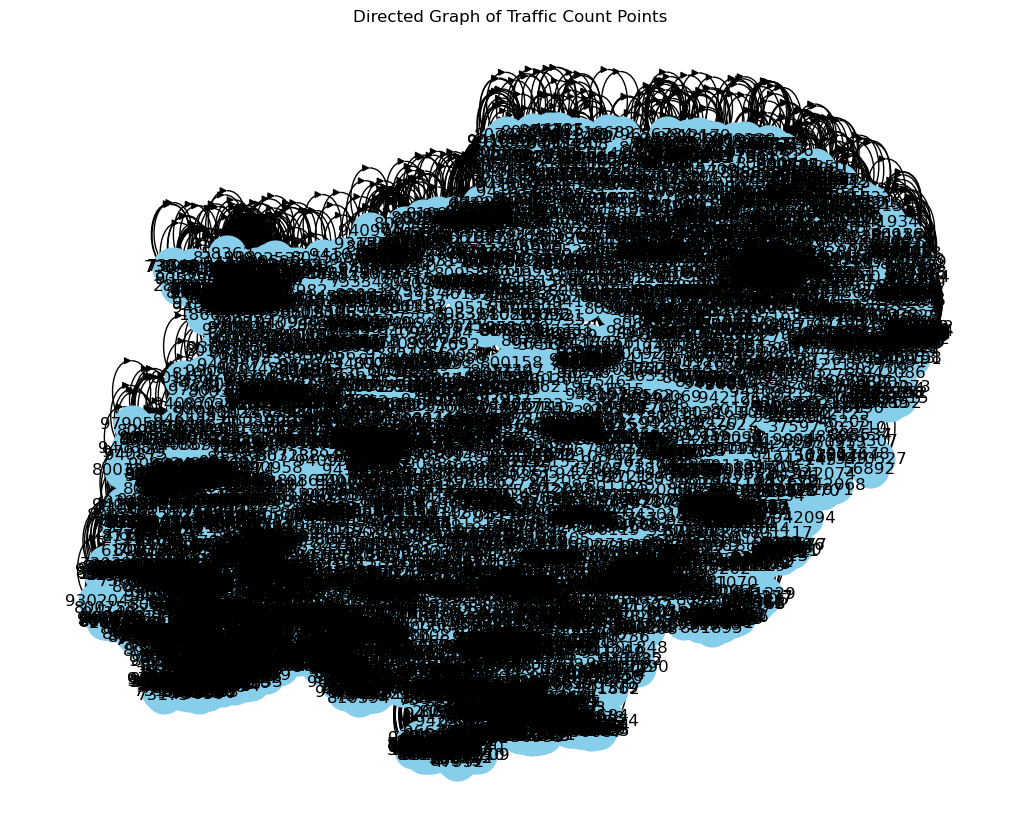

Node degree bounds (min, max): 2 2


In [36]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for _, row in pd_count_points.iterrows():
    G.add_node(row['count_point_id'], pos=(row['longitude'], row['latitude']))

# Add directed edges (assuming self-loops here as placeholders)
for _, row in pd_count_points.iterrows():
    G.add_edge(row['count_point_id'], row['count_point_id'])

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', arrows=True)
plt.title("Directed Graph of Traffic Count Points")
plt.show()

# Print node degree bounds
degrees = [G.degree(n) for n in G.nodes()]
print("Node degree bounds (min, max):", min(degrees), max(degrees))

# Print edge direction information
# for edge in G.edges(data=True):
#     print(f"Edge from node {edge[0]} to node {edge[1]} indicates direction: {edge[2]['direction']}")
